## 저장내용 불러오기

In [2]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [45]:
import csv
new_t = []
neg = []
pos = []
f = open('elect_training.csv','r',encoding='utf-8-sig')
rdf = csv.reader(f)

for i in rdf:
    if str(i[1]) == '0':
        neg.append(i)
    else:
        pos.append(i)
    new_t.append(i)
print(len(new_t))
print(len(neg))
print(len(pos))

658
335
323


In [50]:
training = []
test = []

for i in range(len(pos)):
    if i<223:
        training.append(pos[i])
    else:
        test.append(pos[i])

for j in range(len(neg)):
    if j<235:
        training.append(neg[j])
    else:
        test.append(neg[j])

In [51]:
print(len(test))

200


## 광고성리뷰 필터링

In [72]:
#리뷰에 'http'를 포함하는 링크가 있을 시 제외
new_t = filter(lambda i: 'http' not in i[0], new_t)


## 단어 토큰화

In [52]:
from konlpy.tag import Okt
import nltk
import re


okt = Okt()

def modify(text):
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)' #한글 자모음 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]' #특수기호 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    return text

def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc,norm=True,stem=True)]



training_r = [(tokenize(modify(row[0])),row[1]) for row in training]#[('단어/형태',...,0 or 1)]
test_r = [(tokenize(modify(row[0])),row[1]) for row in test]#[('단어/형태',...,0 or 1)]
print()
token = [t for d in training_r for t in d[0]] #단어들만 따로 모음

text = nltk.Text(token)
print(text)


<Text: 생각/Noun 보다/Josa 가볍다/Adjective 집/Noun 에서/Josa 쓸다/Verb 만해/Noun 요/Josa...>


In [53]:
tokenizer = Tokenizer()
x = []
for i in training_r:
    x.append(i[0])
tokenizer.fit_on_texts(x)
print(tokenizer.word_index)

{'하다/verb': 1, '이/josa': 2, '에/josa': 3, '도/josa': 4, '좋다/adjective': 5, '은/josa': 6, '노트북/noun': 7, '가/josa': 8, '을/josa': 9, '배송/noun': 10, '있다/adjective': 11, '으로/josa': 12, '받다/verb': 13, '같다/adjective': 14, '구매/noun': 15, '는/josa': 16, '없다/adjective': 17, '사용/noun': 18, '제품/noun': 19, '너무/adverb': 20, '로/josa': 21, '것/noun': 22, '자다/verb': 23, '되다/verb': 24, '않다/verb': 25, '가격/noun': 26, '보다/verb': 27, '생각/noun': 28, '하고/josa': 29, '를/josa': 30, '설치/noun': 31, '에서/josa': 32, '이다/adjective': 33, '오다/verb': 34, '가볍다/adjective': 35, '윈도우/noun': 36, '되어다/verb': 37, '키/noun': 38, '아니다/adjective': 39, '성능/noun': 40, '보다/josa': 41, '빠르다/adjective': 42, '들다/verb': 43, '이/determiner': 44, '그램/noun': 45, '쓰다/verb': 46, '의/josa': 47, '정도/noun': 48, '만족하다/adjective': 49, '디자인/noun': 50, '좀/noun': 51, '크다/verb': 52, '적/suffix': 53, '정말/noun': 54, '사은/noun': 55, '요/josa': 56, '2/number': 57, '때/noun': 58, '고/josa': 59, '무게/noun': 60, '더/noun': 61, '수/noun': 62, '많이/adverb': 63, '갤럭시/noun': 64, 

In [310]:
# 명사 동사 형용사 부사만 취급
tokenizer = Tokenizer()
x = []
for i in training_r:
    empty = []
    for j in i[0]:
        if j[1] != '/':
            empty.append(j)
    x.append(empty)
tokenizer.fit_on_texts(x)
print(tokenizer.word_index)

{'하다/verb': 1, '좋다/adjective': 2, '노트북/noun': 3, '배송/noun': 4, '있다/adjective': 5, '으로/josa': 6, '받다/verb': 7, '구매/noun': 8, '사용/noun': 9, '제품/noun': 10, '너무/adverb': 11, '없다/adjective': 12, '같다/adjective': 13, '생각/noun': 14, '자다/verb': 15, '가격/noun': 16, '되다/verb': 17, '않다/verb': 18, '보다/verb': 19, '하고/josa': 20, '되어다/verb': 21, '설치/noun': 22, '에서/josa': 23, '성능/noun': 24, '오다/verb': 25, '윈도우/noun': 26, '이다/adjective': 27, '빠르다/adjective': 28, '아니다/adjective': 29, '보다/josa': 30, '정도/noun': 31, '만족하다/adjective': 32, '가볍다/adjective': 33, '들다/verb': 34, '쓰다/verb': 35, '디자인/noun': 36, '무게/noun': 37, '크다/verb': 38, '많이/adverb': 39, '가성/noun': 40, '상품/noun': 41, '정말/noun': 42, '택배/noun': 43, '사은/noun': 44, '주문/noun': 45, '만족스럽다/adjective': 46, '추가/noun': 47, '느리다/adjective': 48, '기다리다/verb': 49, '쓸다/verb': 50, '그램/noun': 51, '가다/verb': 52, '박스/noun': 53, '화면/noun': 54, '발열/noun': 55, '사다/verb': 56, '속도/noun': 57, '소음/noun': 58, '엄청/adverb': 59, '이온/noun': 60, '괜찮다/adjective': 61, '이다/verb': 

In [54]:
# 단어수 소수인 것들 제거
threshold = 5
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

# 단어의 등장 빈도수가 threshold보다 작으면
if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 3116
등장 빈도가 4번 이하인 희귀 단어의 수: 1
단어 집합에서 희귀 단어의 비율: 0.03209242618741977
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.004363763309478094


In [55]:
X = []
for i in test_r:
    X.append(i[0])


In [313]:
# 명사 동사 형용사만 취급
tokenizer = Tokenizer()
X = []
for i in test_r:
    empty = []
    for j in i[0]:
        if j[1] !='/':
            empty.append(j)
    X.append(empty)

In [56]:
vocab_size = total_cnt - rare_cnt + 2
tokenizer = Tokenizer(vocab_size,oov_token = 'OOV')
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
X = tokenizer.texts_to_sequences(X)

print(x[:10])


[[29, 42, 36, 186, 33, 75, 1184, 57], [24, 19, 30, 1185], [29, 42, 6, 2], [43, 6, 1661, 2, 117, 18, 15, 1662, 156, 2, 12, 433, 1663, 11, 3, 539, 88, 50], [21, 434, 488, 372, 1664, 266, 1186, 1187, 1665, 34], [955, 24, 16, 2, 103, 373], [11, 43, 6, 29, 42, 53, 61, 232, 12, 956, 82, 187, 285, 157, 34, 43, 6, 1666, 144, 203, 2, 607, 103, 325, 9, 6, 2, 107, 5, 50], [102, 43, 11, 7, 88, 118, 608, 1667, 5, 18, 1668, 157], [43, 6, 103, 1669, 5, 18], [20, 3, 27, 169, 21, 6, 76, 15, 102, 5, 43, 55, 108, 4, 540, 57]]


In [57]:
y = [c for _,c in training_r]
Y = [c for _,c in test_r]

y = np.asarray(y).astype('float32')
Y = np.asarray(Y).astype('float32')

리뷰의 최대 길이 : 732
리뷰의 평균 길이 : 50.03493449781659


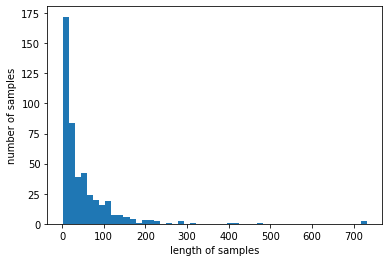

In [58]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(l) for l in x))
print('리뷰의 평균 길이 :',sum(map(len, x))/len(x))
plt.hist([len(s) for s in x], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [60]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
    
max_len = 51
below_threshold_len(max_len, x)

전체 샘플 중 길이가 51 이하인 샘플의 비율: 68.77729257641921


In [61]:
x = pad_sequences(x,maxlen = max_len)
X = pad_sequences(X,maxlen = max_len)

## 학습

In [65]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(filepath='ReviewModel_lstm',monitor='val_acc',save_best_only=True)]

model = models.Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(x,y,epochs=30,batch_size=64,validation_data=(X,Y),callbacks=callbacks)

Epoch 1/30
8/8 [==============================] - 6s 745ms/step - loss: 0.7940 - acc: 0.5677 - val_loss: 0.6819 - val_acc: 0.5350
Epoch 2/30
8/8 [==============================] - 4s 467ms/step - loss: 0.6483 - acc: 0.6812 - val_loss: 0.6674 - val_acc: 0.5700
Epoch 3/30
8/8 [==============================] - 1s 70ms/step - loss: 0.5969 - acc: 0.7620 - val_loss: 0.7109 - val_acc: 0.5700
Epoch 4/30
8/8 [==============================] - 3s 386ms/step - loss: 0.4573 - acc: 0.8144 - val_loss: 0.6820 - val_acc: 0.6950
Epoch 5/30
8/8 [==============================] - 1s 70ms/step - loss: 0.3276 - acc: 0.8930 - val_loss: 2.4085 - val_acc: 0.5650
Epoch 6/30
8/8 [==============================] - 0s 42ms/step - loss: 0.4839 - acc: 0.9061 - val_loss: 0.7694 - val_acc: 0.6450
Epoch 7/30
8/8 [==============================] - 0s 37ms/step - loss: 0.2264 - acc: 0.9301 - val_loss: 0.9112 - val_acc: 0.6900
Epoch 8/30
8/8 [==============================] - 1s 65ms/step - loss: 0.1812 - acc: 0.9498 - 

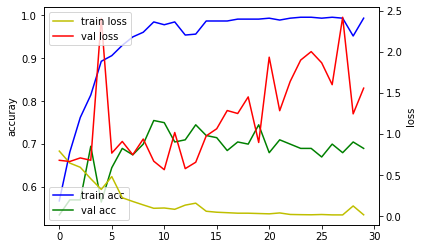

In [66]:
#8
%matplotlib inline
import matplotlib.pyplot as plt

fig, acc_ax = plt.subplots()

loss_ax = acc_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [67]:
loaded_model = load_model('ReviewModel_lstm')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X, Y)[1]))

7/7 [==============================] - 0s 7ms/step - loss: 0.6711 - acc: 0.7550

 테스트 정확도: 0.7550


In [77]:
def sentiment_predict(new_sentence):
    new_sentence = tokenize(new_sentence) # 토큰화
    new = []
    for i in new_sentence:
        new.append(i)
        #if 'Noun' in i or 'Verb' in i or 'Adjective' in i or 'Adverb' in i:
            #new.append(i)
    print(new)
    encoded = tokenizer.texts_to_sequences([new]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
        return 1
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
        return 0
sentiment_predict('사진이랑 똑같아요꼼꼼히 비교하고 선택한 제품인데브랜드, 가격, 성능면에서가성비로는 최고인것 같아요')

['사진/Noun', '이랑/Josa', '똑같다/Adjective', '꼼꼼하다/Adjective', '비교/Noun', '하고/Josa', '선택/Noun', '한/Josa', '제품/Noun', '인데/Josa', '브랜드/Noun', ',/Punctuation', '가격/Noun', ',/Punctuation', '성능/Noun', '면/Noun', '에서가/Josa', '성비/Noun', '로는/Josa', '최고/Noun', '인/Josa', '것/Noun', '같다/Adjective']
61.08% 확률로 부정 리뷰입니다.



0

In [74]:
c = 0
d = 0
for i in test:
    if sentiment_predict(i[0]) != int(i[1]):
        print(i[0])
        print('원래',i[1])
        print('예측',sentiment_predict(i[0]))
        c= c + 1
print('틀린갯수',c)
print(1-c/len(test))


주문한지 3일만에 배송되었습니다.
원래 1
예측 0
어제 주문했는데 오늘 배송완료! 집에 와서 바로 언박싱!ㅋㅋㅋ
원래 1
예측 0
고2 딸아이가 16일부터 인강수업으로 개학이 된다래서 부랴부랴 주문하는차에 좋은가격으로 구입했어요.금요일 주문에 토요일에 배송됐네요.윈도우는 개별적으로 낄아야하고 문서작업하려면 오피스도 구입해야할 듯 합니다.다른 무엇보다 기다리는 수고가 덜하게 익일배송이 되어져서 매우 만족합니다.
원래 1
예측 0
사진이랑 똑같아요꼼꼼히 비교하고 선택한 제품인데브랜드, 가격, 성능면에서가성비로는 최고인것 같아요
원래 1
예측 0
아 사장님.
원래 1
예측 0
SSD의 성능 때문에 삼성노트북만 삽니다.그런데, 좀 비싸지요...이곳은, 프리도스지만 Windows10을 선택하면,함께, 삼성 리커버리솔루션(복원솔루션)까지 깔아주네요.정말 탁월한 선택을 한듯 합니다.삼성 리커버리솔루션을 파티션 나눠서 깔면, 수십만원 더 비싼 Windows10 탑제 정품과 똑같은 수준이 되지요.윈도우즈 까는  수고도 덜고...제품 오자마자 아주 손쉽게 나머지 세팅을 진행할 수 있었습니다.정말 감사합니다... ^^
원래 1
예측 0
빠른배송감사합니다 하루만에도착했네요구매후 셋팅까지 금방했습니다.처음셋팅시 펑션키+F2로 시모스 부팅 설정후펑션키+ F12 로 유에스비 부팅했습니다펑션키조합이 있는지모르고 조금 해매서시간걸린거빼고는 만족합니다.
원래 1
예측 0
라이젠cpu 특성상 듀얼로 메모리 구성하면 더 빨라져요 사은품기간에는ssd 256추가 메모리는 별도구입해서 설치가 저렴하고요 . 상위 모델 라이젠 7 이나  5  엘지에서 나온거 원도우 10포함해서 가격 검색해보심 더이득입니다. 20 에서 30 차이인데  그래픽 cpu  업글모델에 원도우기본설치
원래 1
예측 0
아버지 폰으로 리뷰를 씁니다색감은 첫번째 사진이랑 비슷하고요게임보다 그래픽작업과 영상편집 용으로 구매한거지만 게이밍이라 대부분 게임은 다 돌아갑니다 모니터가 144hz라 눈도 편하고요추가 구성 상품은 따로 구입하시

예측 1
틀린갯수 55
0.725


In [72]:
print(len(test))

200
